Emotion Detection

In [5]:
!pip install kaggle


Loading Data Through Kaggle API

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip toronto-emotional-speech-set-tess.zip

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 426M/428M [00:17<00:00, 28.1MB/s]
100% 428M/428M [00:17<00:00, 25.9MB/s]
Archive:  toronto-emotional-speech-set-tess.zip
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_base_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_bath_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_bean_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_beg_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_bite_fear.wav  
  inflating: TESS Toronto emotional speech set data/OAF_Fear/OAF_boat_fear.wav  
  inflating: TESS Toronto emotional speech set data/OA

In [6]:
import os
os.listdir('/content/TESS Toronto emotional speech set data')


['YAF_angry',
 'OAF_Sad',
 'YAF_neutral',
 'YAF_sad',
 'OAF_neutral',
 'YAF_disgust',
 'OAF_Pleasant_surprise',
 'OAF_Fear',
 'OAF_disgust',
 'YAF_happy',
 'OAF_angry',
 'OAF_happy',
 'YAF_fear',
 'YAF_pleasant_surprised']

Preprocessing of Data

In [9]:
import os
import librosa
import numpy as np
import pandas as pd


In [10]:
def preprocess_audio(file_path, target_sr=16000):
    audio, sr = librosa.load(file_path, sr=None)

    # Resample audio to 16kHz
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

    audio = librosa.util.normalize(audio)

    return audio, target_sr


In [11]:
dataset_path = "/content/TESS Toronto emotional speech set data"
processed_data = []

for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            audio, sr = preprocess_audio(file_path)
            label = os.path.basename(root)
            processed_data.append((audio, sr, label))


In [12]:
df = pd.DataFrame(processed_data, columns=["audio", "sampling_rate", "label"])
df.head()

,audio,sampling_rate,label
0,"[6.140828e-05, -8.327856e-05, 2.0519818e-05, -...",16000,YAF_angry
1,"[1.6929998e-06, -0.0021492238, -0.0016884358, ...",16000,YAF_angry
2,"[-0.0001740616, -2.3792167e-05, -1.23909085e-0...",16000,YAF_angry
3,"[0.0008972463, -0.0021053648, -0.0018978785, -...",16000,YAF_angry
4,"[3.7341053e-06, -0.00046910692, -0.00018811878...",16000,YAF_angry


Feature Extraction

In [13]:
import librosa
import numpy as np


def extract_mfcc(audio, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)  # Mean of MFCCs across frames

df['features'] = df.apply(lambda row: extract_mfcc(row['audio'], row['sampling_rate']), axis=1)


Splitting Dataset

In [16]:
from sklearn.model_selection import train_test_split

X = np.array(df['features'].tolist())
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


model = SVC()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 84.11%


Mean Pitch: 527.69 Hz
Energy: 0.03
Mean Amplitude: 0.11
Max Amplitude: 1.00
Min Amplitude: 0.00


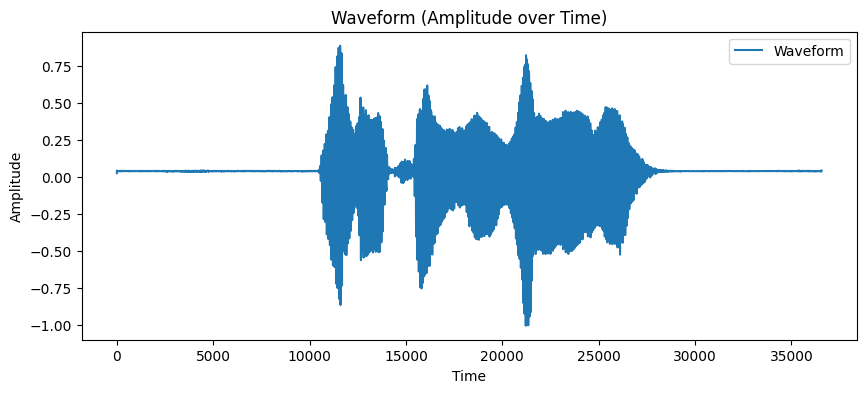

In [20]:


from IPython.display import Audio, display

audio_path = '/content/drive/MyDrive/audio_data/new_data/ALL/DC_f03.wav'


display(Audio(audio_path, autoplay=True))

import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_file_path = '/content/drive/MyDrive/audio_data/new_data/ALL/DC_f03.wav'  # Replace with your file path
y, sr = librosa.load(audio_file_path, sr=16000)   # Load audio at 16 kHz

pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

energy = np.sum(y ** 2) / len(y)

# Calculate the mean pitch value
pitch_values = pitches[pitches > 0]  # Filter out non-pitch values
mean_pitch = np.mean(pitch_values)
pitch=mean_pitch

# Extract amplitude
amplitude1 = np.abs(y)

mean_amplitude = np.mean(amplitude1)
max_amplitude = np.max(amplitude1)
min_amplitude = np.min(amplitude1)

amplitude=mean_amplitude

print(f'Mean Pitch: {mean_pitch:.2f} Hz')
print(f'Energy: {energy:.2f}')
print(f'Mean Amplitude: {mean_amplitude:.2f}')
print(f'Max Amplitude: {max_amplitude:.2f}')
print(f'Min Amplitude: {min_amplitude:.2f}')

plt.figure(figsize=(10, 4))
plt.plot(y, label="Waveform")
plt.title('Waveform (Amplitude over Time)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()





In [22]:
import librosa


def preprocess_and_extract_mfcc(file_path, n_mfcc=13, target_sr=16000):

    audio, sr = librosa.load(file_path, sr=target_sr)


    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)


    return np.mean(mfccs.T, axis=0)


def evaluate_model_on_audio(model, file_path):
    # Preprocess and extract features
    mfcc_features = preprocess_and_extract_mfcc(file_path)

    # Reshape for the model (since it expects 2D input)
    mfcc_features = mfcc_features.reshape(1, -1)

    # Predict the emotion
    predicted_label = model.predict(mfcc_features)

    return predicted_label[0]


new_audio_file = "/content/drive/MyDrive/audio_data/anger/a02 (3).wav"
predicted_emotion = evaluate_model_on_audio(model, new_audio_file)
print(f"Predicted Emotion: {predicted_emotion}")


Predicted Emotion: OAF_angry
